In [ ]:

import tensorflow as tf
print("TF version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))


!nvidia-smi

TF version: 2.19.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Tue Nov 11 16:07:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# kaggle install kaggle.json uplode
!pip install -q kaggle

from google.colab import files
files.upload()


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"atanumondal988","key":"64f27dd1f48c9c4791576755accc2e92"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images -p /content


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0
lung-and-colon-cancer-histopathological-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls "/content/drive/MyDrive"


'231003003239-ATANU MONDAL(PDF-1).pdf'
'All code and output make in One pdf.gdoc'
'atanu(231003003239) (1).pdf'
'ATANU[231003003239] oops lab.pdf'
'atanu(231003003239).pdf'
 atanu2520.lic
'Atanu (3239)FWCP.pdf'
'atanu lab [231003003239].pdf'
'ATANU MONDAL-231003003239(FWCP).pdf'
'ATANU MONDAL [231003003239]-FWCP.pdf'
' Atanu Mondal_3239(DBMS-3).docx'
' Atanu Mondal_3239(DBMS-3).gdoc'
'ATANU MONDAL-CV-(231003003239).pdf'
'ATANU MONDAL(FWC)[231003003239].pdf'
'atanu mondal - numerica (231003003239)l.pdf'
 co.doc
'Colab Notebooks'
'Copy of F11_student_list_final(1).xlsx'
 cv.pdf.pdf
 DE1.pdf
 DE2.pdf
 DE3.pdf
'DocScanner 25-Apr-2024 9-37 pm.pdf'
'Document from ATANU.m'
 English.DOC-20240125-WA0001..pdf
'english- presentation .pdf'
 ENZYMES.gdoc
 EULA.Clickwrap.v.10.7.2019.08.28.pdf
'Gmail - Invoice for your Ride CRN8931730656.pdf'
'Grade Sheet - 2025-09-02 18:32:37.pdf'
'KUSHAL(3225)FWCP.pdf'
'kushal(3225)_FWCP.pdf'
'KUSHAL KAR-231003003225(FWCP).pdf'
'KUSHAL KAR [231003003225]-FWCP.pdf'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive"


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
%%bash
# Drive-lungspicture.zip-unzip
ZIP_PATH=$(find /content/drive/MyDrive -type f -name "lungspicture.zip" -print -quit)
echo "Found ZIP: $ZIP_PATH"

if [ -z "$ZIP_PATH" ]; then
  echo "lungspicture.zip পাওয়া যায়নি — দয়া করে নিশ্চিত করো ফাইলটি MyDrive বা তার সাবফোল্ডারে আছে।"
else
  mkdir -p /content/dataset
  unzip -oq "$ZIP_PATH" -d /content/dataset
  echo "Unzip completed to /content/dataset"
fi


Found ZIP: /content/drive/MyDrive/Colab Notebooks/lungspicture.zip
Unzip completed to /content/dataset


In [ ]:
!ls -la /content/dataset

!find /content/dataset -maxdepth 2 -type d -print

# image files count
!find /content/dataset -type f \( -iname "*.jpg" -o -iname "*.jpeg" -o -iname "*.png" \) | wc -l


total 12
drwxr-xr-x 3 root root 4096 Nov 11 16:04 .
drwxr-xr-x 1 root root 4096 Nov 11 16:22 ..
drwxr-xr-x 4 root root 4096 Nov 11 16:05 lung_colon_image_set
/content/dataset
/content/dataset/lung_colon_image_set
/content/dataset/lung_colon_image_set/colon_image_sets
/content/dataset/lung_colon_image_set/lung_image_sets
25000


In [ ]:
import os, shutil, glob

src_root = "/content/dataset"
dst_root = "/content/LungCancerDataset"
os.makedirs(dst_root, exist_ok=True)

top_entries = [os.path.basename(p) for p in glob.glob(os.path.join(src_root, "*"))]
print("Top-level entries found in /content/dataset :\n", top_entries)

# auto-mapping rules (common patterns)
def map_folder(name):
    n = name.lower()
    if "aca" in n or "aden" in n:
        return "adenocarcinoma"
    if "scc" in n or "squamous" in n or "sqc" in n:
        return "squamous"
    # treat 'n' or 'normal' or 'benign' or 'lung_n' as benign
    if "benign" in n or "normal" in n or (n.endswith("_n") or "_n" in n or n == "lung_n"):
        return "benign"
    # fallback: if folder name contains 'lung' but not others -> benign
    if "lung" in n:
        return "benign"
    return None

copied = []
for entry in top_entries:
    src = os.path.join(src_root, entry)
    if os.path.isdir(src):
        tgt_label = map_folder(entry)
        if tgt_label:
            tgt_dir = os.path.join(dst_root, tgt_label)
            os.makedirs(tgt_dir, exist_ok=True)
            # copy files (only files, avoid subdir complexity)
            for f in os.listdir(src):
                sf = os.path.join(src, f)
                if os.path.isfile(sf):
                    shutil.copy(sf, tgt_dir)
            copied.append((entry, tgt_label))
        else:
            print(f"Skipping (no mapping rule): {entry} — check manually if this is lung data.")
print("Auto-copy summary:", copied)


Top-level entries found in /content/dataset :
 ['lung_colon_image_set']
Auto-copy summary: [('lung_colon_image_set', 'benign')]


In [49]:
import os, shutil

src_root = "/content/dataset/lung_colon_image_set"
dst_root = "/content/LungCancerDataset"
os.makedirs(dst_root, exist_ok=True)

print("Subfolders inside lung_colon_image_set:\n", os.listdir(src_root))

lung_src = os.path.join(src_root, "lung_image_sets")
if not os.path.exists(lung_src):
    print("⚠️ 'lung_image_sets' নামের ফোল্ডার পাওয়া যায়নি — নিচের path চেক করো:")
    !find /content/dataset/lung_colon_image_set -maxdepth 2 -type d
else:
    print("\nSubfolders inside lung_image_sets:")
    print(os.listdir(lung_src))

    folders = {
        "lung_aca": "adenocarcinoma",
        "lung_scc": "squamous",
        "lung_n": "benign"
    }

    copied = []
    for src_name, tgt_name in folders.items():
        src_path = os.path.join(lung_src, src_name)
        tgt_path = os.path.join(dst_root, tgt_name)
        if os.path.exists(src_path):
            os.makedirs(tgt_path, exist_ok=True)
            for f in os.listdir(src_path):
                sf = os.path.join(src_path, f)
                if os.path.isfile(sf):
                    shutil.copy(sf, tgt_path)
            copied.append((src_name, tgt_name))
        else:
            print(f"⚠️ Folder not found: {src_path}")

    print("\n✅ Copy complete! Summary:")
    for s, t in copied:
        print(f"{s} → {t}")


Subfolders inside lung_colon_image_set:
 ['lung_image_sets', 'colon_image_sets']

Subfolders inside lung_image_sets:
['lung_n', 'lung_scc', 'lung_aca']

✅ Copy complete! Summary:
lung_aca → adenocarcinoma
lung_scc → squamous
lung_n → benign


In [50]:
# ফোল্ডারগুলো ঠিকঠাক আছে কিনা দেখা
!find /content/LungCancerDataset -maxdepth 2 -type d -print

# মোট কয়টা ইমেজ আছে গণনা করা
!find /content/LungCancerDataset -type f \( -iname "*.jpg" -o -iname "*.jpeg" -o -iname "*.png" \) | wc -l

# প্রত্যেক ক্লাসে কয়টা ছবি আছে দেখা
!echo "adenocarcinoma count:"; ls /content/LungCancerDataset/adenocarcinoma | wc -l
!echo "squamous count:"; ls /content/LungCancerDataset/squamous | wc -l
!echo "benign count:"; ls /content/LungCancerDataset/benign | wc -l


/content/LungCancerDataset
/content/LungCancerDataset/squamous
/content/LungCancerDataset/benign
/content/LungCancerDataset/adenocarcinoma
15000
adenocarcinoma count:
5000
squamous count:
5000
benign count:
5000


In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (180, 180)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   # 80% train, 20% validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    '/content/LungCancerDataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    '/content/LungCancerDataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

checkpoint = ModelCheckpoint('/content/drive/MyDrive/lung_cnn_best.h5', monitor='val_accuracy', save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[checkpoint, earlystop, reduce_lr]
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,259 (25.36 MB)

 Trainable params: 6,647,811 (25.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8397 - loss: 1.3955

375/375 ━━━━━━━━━━━━━━━━━━━━ 1527s 4s/step - accuracy: 0.8398 - loss: 1.3934 - val_accuracy: 0.3503 - val_loss: 19.0049 - learning_rate: 0.0010
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9029 - loss: 0.2659

375/375 ━━━━━━━━━━━━━━━━━━━━ 1428s 4s/step - accuracy: 0.9029 - loss: 0.2659 - val_accuracy: 0.8833 - val_loss: 0.3401 - learning_rate: 0.0010
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1465s 4s/step - accuracy: 0.9112 - loss: 0.2395 - val_accuracy: 0.7427 - val_loss: 1.2799 - learning_rate: 0.0010
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9168 - loss: 0.2113

375/375 ━━━━━━━━━━━━━━━━━━━━ 1397s 4s/step - accuracy: 0.9168 - loss: 0.2113 - val_accuracy: 0.9393 - val_loss: 0.1671 - learning_rate: 0.0010
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9377 - loss: 0.1609

375/375 ━━━━━━━━━━━━━━━━━━━━ 1409s 4s/step - accuracy: 0.9377 - loss: 0.1609 - val_accuracy: 0.9440 - val_loss: 0.1248 - learning_rate: 0.0010
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1377s 4s/step - accuracy: 0.9453 - loss: 0.1394 - val_accuracy: 0.8353 - val_loss: 0.3973 - learning_rate: 0.0010
Epoch 7/15
359/375 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9443 - loss: 0.1491

In [ ]:
model.save("/content/drive/MyDrive/lung_cancer_model.keras")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (180, 180)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    '/content/LungCancerDataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    '/content/LungCancerDataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

checkpoint = ModelCheckpoint('/content/drive/MyDrive/lung_cnn_best.h5', monitor='val_accuracy', save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[checkpoint, earlystop, reduce_lr]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,259 (25.36 MB)

 Trainable params: 6,647,811 (25.36 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.8232 - loss: 2.4057

375/375 ━━━━━━━━━━━━━━━━━━━━ 168s 433ms/step - accuracy: 0.8233 - loss: 2.4016 - val_accuracy: 0.4060 - val_loss: 11.4516 - learning_rate: 0.0010
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.9096 - loss: 0.2358

375/375 ━━━━━━━━━━━━━━━━━━━━ 164s 436ms/step - accuracy: 0.9096 - loss: 0.2358 - val_accuracy: 0.8067 - val_loss: 1.2149 - learning_rate: 0.0010
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.9133 - loss: 0.2665

375/375 ━━━━━━━━━━━━━━━━━━━━ 158s 421ms/step - accuracy: 0.9133 - loss: 0.2665 - val_accuracy: 0.9203 - val_loss: 0.2342 - learning_rate: 0.0010
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.9371 - loss: 0.1674

375/375 ━━━━━━━━━━━━━━━━━━━━ 158s 422ms/step - accuracy: 0.9371 - loss: 0.1674 - val_accuracy: 0.9333 - val_loss: 0.1794 - learning_rate: 0.0010
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 157s 420ms/step - accuracy: 0.9390 - loss: 0.1534 - val_accuracy: 0.9243 - val_loss: 0.1818 - learning_rate: 0.0010
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 155s 414ms/step - accuracy: 0.9439 - loss: 0.1467 - val_accuracy: 0.8520 - val_loss: 0.6371 - learning_rate: 0.0010
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 153s 408ms/step - accuracy: 0.9343 - loss: 0.1835 - val_accuracy: 0.8907 - val_loss: 0.2812 - learning_rate: 0.0010
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.9547 - loss: 0.1197

375/375 ━━━━━━━━━━━━━━━━━━━━ 156s 417ms/step - accuracy: 0.9548 - loss: 0.1197 - val_accuracy: 0.9443 - val_loss: 0.1665 - learning_rate: 5.0000e-04
Epoch 9/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.9635 - loss: 0.0941

375/375 ━━━━━━━━━━━━━━━━━━━━ 155s 413ms/step - accuracy: 0.9635 - loss: 0.0941 - val_accuracy: 0.9530 - val_loss: 0.1098 - learning_rate: 5.0000e-04
Epoch 10/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 154s 410ms/step - accuracy: 0.9603 - loss: 0.0997 - val_accuracy: 0.9327 - val_loss: 0.2531 - learning_rate: 5.0000e-04
Epoch 11/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 152s 405ms/step - accuracy: 0.9635 - loss: 0.0907 - val_accuracy: 0.9420 - val_loss: 0.1756 - learning_rate: 5.0000e-04
Epoch 12/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 154s 409ms/step - accuracy: 0.9688 - loss: 0.0819 - val_accuracy: 0.9260 - val_loss: 0.2442 - learning_rate: 5.0000e-04
Epoch 13/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9739 - loss: 0.0647

375/375 ━━━━━━━━━━━━━━━━━━━━ 154s 412ms/step - accuracy: 0.9739 - loss: 0.0647 - val_accuracy: 0.9750 - val_loss: 0.0662 - learning_rate: 2.5000e-04
Epoch 14/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.9829 - loss: 0.0501

375/375 ━━━━━━━━━━━━━━━━━━━━ 158s 422ms/step - accuracy: 0.9829 - loss: 0.0501 - val_accuracy: 0.9797 - val_loss: 0.0555 - learning_rate: 2.5000e-04
Epoch 15/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 155s 413ms/step - accuracy: 0.9808 - loss: 0.0538 - val_accuracy: 0.9690 - val_loss: 0.0815 - learning_rate: 2.5000e-04


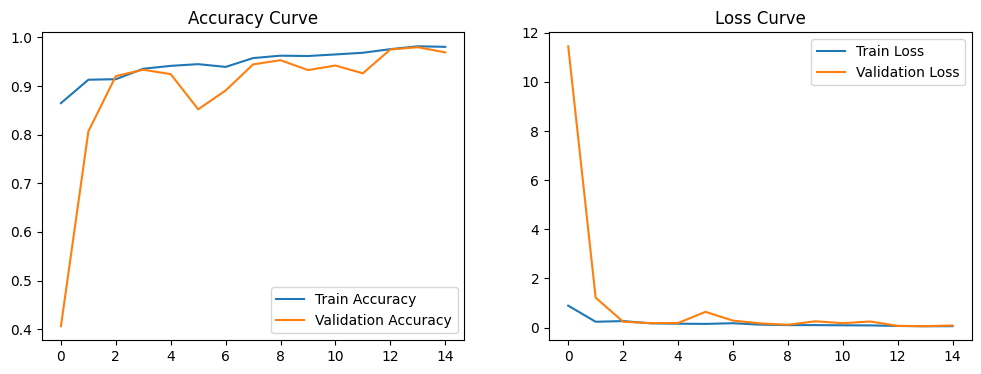

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 350ms/step
                precision    recall  f1-score   support

adenocarcinoma       0.32      0.32      0.32      1000
        benign       0.33      0.33      0.33      1000
      squamous       0.33      0.33      0.33      1000

      accuracy                           0.33      3000
     macro avg       0.33      0.33      0.33      3000
  weighted avg       0.33      0.33      0.33      3000



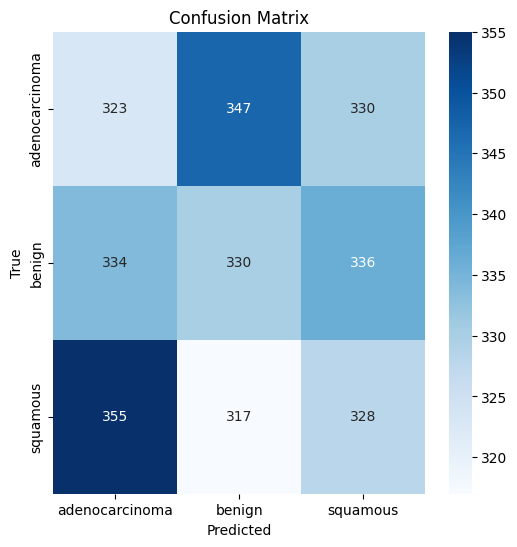

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

val_gen.reset()
preds = model.predict(val_gen, steps=(val_gen.samples // 32) + 1, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes[:len(y_pred)]

# report print
print(classification_report(y_true, y_pred, target_names=list(val_gen.class_indices.keys())))

#confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(val_gen.class_indices.keys()),
            yticklabels=list(val_gen.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/lung_cancer_model_final.keras')
print("✅ Model saved successfully in Drive!")


✅ Model saved successfully in Drive!


In [ ]:
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/content/LungCancerDataset/adenocarcinoma/sample.jpeg"
img = image.load_img(img_path, target_size=(180,180))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
classes = list(train_gen.class_indices.keys())

print("Predicted Class:", classes[np.argmax(pred)])
print("Confidence:", np.max(pred))


FileNotFoundError: [Errno 2] No such file or directory: '/content/LungCancerDataset/adenocarcinoma/sample.jpeg'

In [ ]:
!ls /content/LungCancerDataset/adenocarcinoma | head


lungaca1000.jpeg
lungaca1001.jpeg
lungaca1002.jpeg
lungaca1003.jpeg
lungaca1004.jpeg
lungaca1005.jpeg
lungaca1006.jpeg
lungaca1007.jpeg
lungaca1008.jpeg
lungaca1009.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
🧠 Predicted Class: adenocarcinoma
🎯 Confidence: 99.65 %


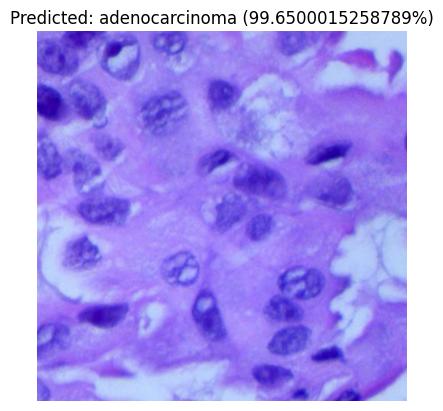

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


img_path = "/content/LungCancerDataset/adenocarcinoma/lungaca1000.jpeg"

# image lode
img = image.load_img(img_path, target_size=(180,180))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


pred = model.predict(img_array)
classes = list(train_gen.class_indices.keys())
predicted_class = classes[np.argmax(pred)]
confidence = np.max(pred)

# prediction
print("🧠 Predicted Class:", predicted_class)
print("🎯 Confidence:", round(confidence * 100, 2), "%")

plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted: {predicted_class} ({round(confidence*100,2)}%)")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


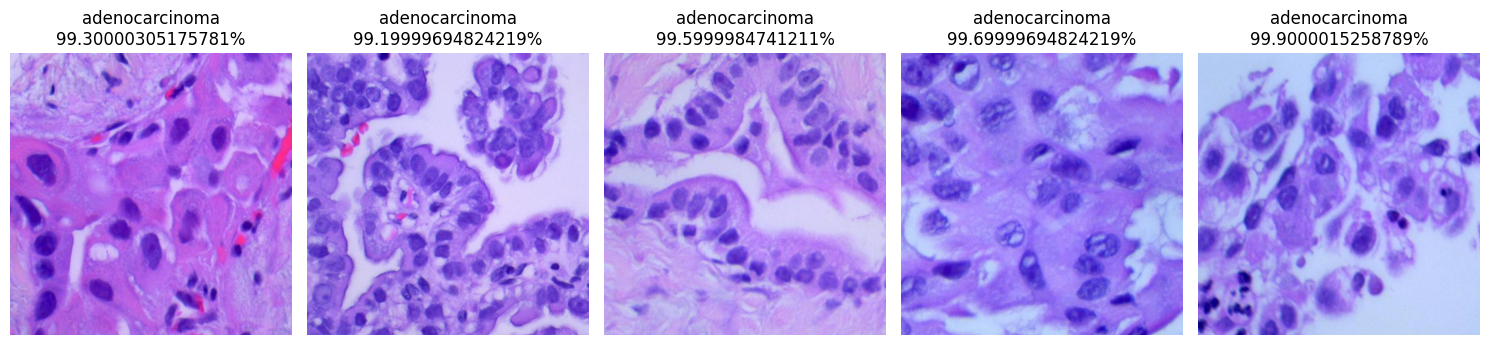

In [ ]:
import os

test_folder = "/content/LungCancerDataset/adenocarcinoma"
test_images = sorted(os.listdir(test_folder))[:5]  # first 5 image

plt.figure(figsize=(15,6))
for i, file in enumerate(test_images):
    img_path = os.path.join(test_folder, file)
    img = image.load_img(img_path, target_size=(180,180))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    predicted_class = classes[np.argmax(pred)]
    confidence = np.max(pred)

    plt.subplot(1,5,i+1)
    plt.imshow(image.load_img(img_path))
    plt.title(f"{predicted_class}\n{round(confidence*100,1)}%")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
model.save("/content/drive/MyDrive/lung_cancer_detector_final.keras")
print("✅ Model saved successfully in Drive!")


✅ Model saved successfully in Drive!


In [40]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# kaggle ইন্সটল ও kaggle.json আপলোড
!pip install -q kaggle

from google.colab import files
files.upload()   # এখানে kaggle.json ফাইল আপলোড করবে


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"atanumondal988","key":"64f27dd1f48c9c4791576755accc2e92"}'}

In [43]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [44]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images -p /content


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0
 99% 1.74G/1.76G [00:12<00:00, 212MB/s]
100% 1.76G/1.76G [00:12<00:00, 145MB/s]


In [45]:
!ls "/content/drive/MyDrive"


'231003003239-ATANU MONDAL(PDF-1).pdf'
'All code and output make in One pdf.gdoc'
'atanu(231003003239) (1).pdf'
'ATANU[231003003239] oops lab.pdf'
'atanu(231003003239).pdf'
 atanu2520.lic
'Atanu (3239)FWCP.pdf'
'atanu lab [231003003239].pdf'
'ATANU MONDAL-231003003239(FWCP).pdf'
'ATANU MONDAL [231003003239]-FWCP.pdf'
' Atanu Mondal_3239(DBMS-3).docx'
' Atanu Mondal_3239(DBMS-3).gdoc'
'ATANU MONDAL-CV-(231003003239).pdf'
'ATANU MONDAL(FWC)[231003003239].pdf'
'atanu mondal - numerica (231003003239)l.pdf'
 co.doc
'Colab Notebooks'
'Copy of F11_student_list_final(1).xlsx'
 cv.pdf.pdf
 DE1.pdf
 DE2.pdf
 DE3.pdf
'DocScanner 25-Apr-2024 9-37 pm.pdf'
'Document from ATANU.m'
 English.DOC-20240125-WA0001..pdf
'english- presentation .pdf'
 ENZYMES.gdoc
 EULA.Clickwrap.v.10.7.2019.08.28.pdf
'Gmail - Invoice for your Ride CRN8931730656.pdf'
'Grade Sheet - 2025-09-02 18:32:37.pdf'
'KUSHAL(3225)FWCP.pdf'
'kushal(3225)_FWCP.pdf'
'KUSHAL KAR-231003003225(FWCP).pdf'
'KUSHAL KAR [231003003225]-FWCP.pdf'


In [46]:
%%bash
# Drive-এ প্রথম পাওয়া lungspicture.zip-এর path বের করে আনজিপ করবে (quiet + overwrite)
ZIP_PATH=$(find /content/drive/MyDrive -type f -name "lungspicture.zip" -print -quit)
echo "Found ZIP: $ZIP_PATH"

if [ -z "$ZIP_PATH" ]; then
  echo "lungspicture.zip পাওয়া যায়নি — দয়া করে নিশ্চিত করো ফাইলটি MyDrive বা তার সাবফোল্ডারে আছে।"
else
  mkdir -p /content/dataset
  unzip -oq "$ZIP_PATH" -d /content/dataset
  echo "Unzip completed to /content/dataset"
fi


Found ZIP: /content/drive/MyDrive/Colab Notebooks/lungspicture.zip
Unzip completed to /content/dataset


In [47]:
# উপরের লেভেল দেখো
!ls -la /content/dataset

# ২ লেভেল পর্যন্ত ডিরেক্টরিগুলো দেখো (কোন ফোল্ডার আছে দেখে নাও)
!find /content/dataset -maxdepth 2 -type d -print

# সব image files count দেখো (jpg/jpeg/png)
!find /content/dataset -type f \( -iname "*.jpg" -o -iname "*.jpeg" -o -iname "*.png" \) | wc -l


total 112
drwxr-xr-x 3 root root   4096 Nov 12 13:56 .
drwxr-xr-x 1 root root 102400 Nov 12 13:57 ..
drwxr-xr-x 4 root root   4096 Nov 12 13:56 lung_colon_image_set
/content/dataset
/content/dataset/lung_colon_image_set
/content/dataset/lung_colon_image_set/lung_image_sets
/content/dataset/lung_colon_image_set/colon_image_sets
25000


In [48]:
import os, shutil, glob

src_root = "/content/dataset"
dst_root = "/content/LungCancerDataset"
os.makedirs(dst_root, exist_ok=True)

top_entries = [os.path.basename(p) for p in glob.glob(os.path.join(src_root, "*"))]
print("Top-level entries found in /content/dataset :\n", top_entries)

# auto-mapping rules (common patterns)
def map_folder(name):
    n = name.lower()
    if "aca" in n or "aden" in n:
        return "adenocarcinoma"
    if "scc" in n or "squamous" in n or "sqc" in n:
        return "squamous"
    # treat 'n' or 'normal' or 'benign' or 'lung_n' as benign
    if "benign" in n or "normal" in n or (n.endswith("_n") or "_n" in n or n == "lung_n"):
        return "benign"
    # fallback: if folder name contains 'lung' but not others -> benign
    if "lung" in n:
        return "benign"
    return None

copied = []
for entry in top_entries:
    src = os.path.join(src_root, entry)
    if os.path.isdir(src):
        tgt_label = map_folder(entry)
        if tgt_label:
            tgt_dir = os.path.join(dst_root, tgt_label)
            os.makedirs(tgt_dir, exist_ok=True)
            # copy files (only files, avoid subdir complexity)
            for f in os.listdir(src):
                sf = os.path.join(src, f)
                if os.path.isfile(sf):
                    shutil.copy(sf, tgt_dir)
            copied.append((entry, tgt_label))
        else:
            print(f"Skipping (no mapping rule): {entry} — check manually if this is lung data.")
print("Auto-copy summary:", copied)


Top-level entries found in /content/dataset :
 ['lung_colon_image_set']
Auto-copy summary: [('lung_colon_image_set', 'benign')]
